In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from langdetect import detect
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Languages 

af, ar, bg, bn, ca, cs, cy, da, de, el, en, es, et, fa, fi, fr, gu, he,
hi, hr, hu, id, it, ja, kn, ko, lt, lv, mk, ml, mr, ne, nl, no, pa, pl,
pt, ro, ru, sk, sl, so, sq, sv, sw, ta, te, th, tl, tr, uk, ur, vi, zh-cn, zh-tw

## Get Tweets

In [2]:
#year/month/day
#query = "(from:UNAM_MX) until:2023-02-25 since:2022-10-01"
language = 'en'
max_Tweets = 1000
def Query(query, limit = None, language = 'en'):
    Tweet_list = []
    if limit == None:
        for tweet in sntwitter.TwitterSearchScraper(query).get_items():
            try: 
                if detect(tweet.content) == language: #Verify language
                    Tweet_list.append([tweet.date, tweet.user.username , tweet.content])   
            except:
                pass
    else:
        for tweet in sntwitter.TwitterSearchScraper(query).get_items():
            if len(Tweet_list) == limit: #Check limit
                break
            else:
                try:
                    if detect(tweet.content) == language: #Verify language
                        Tweet_list.append([tweet.date, tweet.user.username , tweet.content])   
                except:
                    pass
    df = pd.DataFrame(Tweet_list, columns = ['Date', 'User', 'Tweet'])
    return df

In [3]:
dfXbox = Query('xbox', 10000, language)

In [4]:
dfPlayStation = Query('playstation', 10000, language)

Tweet 1630372461434015745 contains an app icon medium key '4_1630347770929516544' on app 'android_app'/'com.kouzoh.mercari', but the corresponding medium is missing; dropping


In [5]:
dfXbox = dfXbox.drop("User", axis = 1)

In [6]:
dfPlayStation = dfPlayStation.drop("User", axis = 1)

In [7]:
dfXbox['Length'] = dfXbox['Tweet'].apply(lambda x:len(x))
dfPlayStation['Length'] = dfPlayStation['Tweet'].apply(lambda x:len(x))

## Data analysis

<AxesSubplot:xlabel='Length', ylabel='Count'>

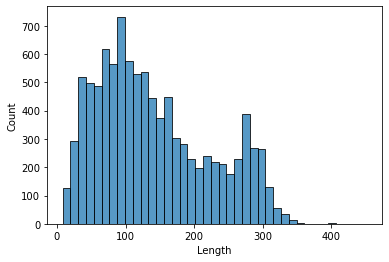

In [8]:
sns.histplot(dfXbox['Length'])

In [9]:
dfXbox['Length'].describe()

count    10000.000000
mean       140.970000
std         82.318955
min          8.000000
25%         76.000000
50%        122.000000
75%        199.000000
max        452.000000
Name: Length, dtype: float64

<AxesSubplot:xlabel='Length', ylabel='Count'>

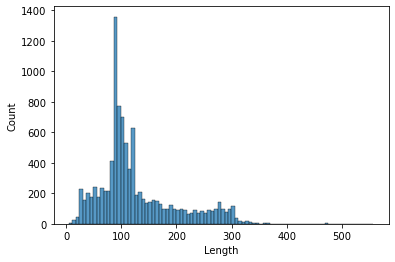

In [10]:
sns.histplot(dfPlayStation['Length'])

In [11]:
dfPlayStation['Length'].describe()

count    10000.000000
mean       126.415000
std         70.358761
min          5.000000
25%         87.000000
50%        104.000000
75%        155.000000
max        557.000000
Name: Length, dtype: float64

## Data Cleaning

In [12]:
def RemoveAt(string):
    stringlist = string.split("@",len(string))
    for i in range(len(stringlist)):
        if " " in stringlist[i]:
            stringlist[i] = stringlist[i].split(" ",1)[1]
    return ''.join(stringlist) 

In [13]:
dfXbox['Tweet'] = dfXbox['Tweet'].apply(lambda x:RemoveAt(x))
dfPlayStation['Tweet'] = dfPlayStation['Tweet'].apply(lambda x:RemoveAt(x))

dfXbox['Date'] = dfXbox['Date'].apply(lambda x:str(x.hour) + ':' + str(x.minute) + ':' + str(x.second))
dfPlayStation['Date'] = dfPlayStation['Date'].apply(lambda x:str(x.hour) + ':' + str(x.minute) + ':' + str(x.second))

## Sentiment Analysis

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
SIA = SentimentIntensityAnalyzer()

In [16]:
dfXbox['Label'] = dfXbox['Tweet'].apply(lambda x:1 if SIA.polarity_scores(x)['compound'] > 0 else 0)
dfXbox['Compound'] = dfXbox['Tweet'].apply(lambda x:SIA.polarity_scores(x)['compound'])

<AxesSubplot:xlabel='Label', ylabel='Count'>

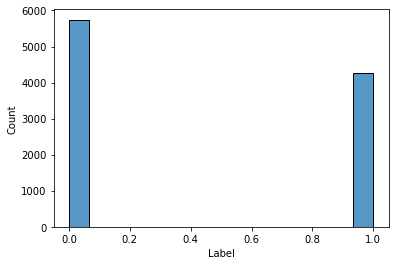

In [17]:
sns.histplot(dfXbox['Label'])

In [18]:
dfPlayStation['Label'] = dfPlayStation['Tweet'].apply(lambda x:1 if SIA.polarity_scores(x)['compound'] > 0 else 0)
dfPlayStation['Compound'] = dfPlayStation['Tweet'].apply(lambda x:SIA.polarity_scores(x)['compound'])

<AxesSubplot:xlabel='Label', ylabel='Count'>

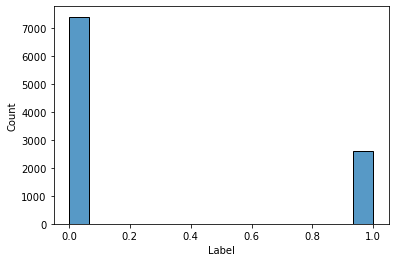

In [19]:
sns.histplot(dfPlayStation['Label'])

## Subjectivity

In [20]:
from textblob import TextBlob

In [21]:
dfXbox['Subjectivity'] = dfXbox['Tweet'].apply(lambda x:1 if TextBlob(x).sentiment[1] > 0.5 else 0)
dfPlayStation['Subjectivity'] = dfPlayStation['Tweet'].apply(lambda x:1 if TextBlob(x).sentiment[1] > 0.5 else 0)

## Positive and Negative

In [22]:
PositiveXbox = dfXbox[dfXbox['Label'] == 1]
NegativeXbox = dfXbox[dfXbox['Label'] == 0]
#PostivieObjectiveXbox = dfXbox[dfXbox['Label'] == 1 and dfXbox['Subjectivity'] == 0]
#NegativeObjectiveXbox = dfXbox[dfXbox['Label'] == 0 and dfXbox['Subjectivity'] == 0]

In [23]:
PositivePlay = dfPlayStation[dfPlayStation['Label'] == 1]
NegativePlay = dfPlayStation[dfPlayStation['Label'] == 0]

## Wordcloud

In [24]:
from wordcloud import WordCloud

#### Xbox

In [25]:
PositiveTextXbox = ''.join(PositiveXbox['Tweet'].tolist())
NegativeTextXbox = ''.join(NegativeXbox['Tweet'].tolist())

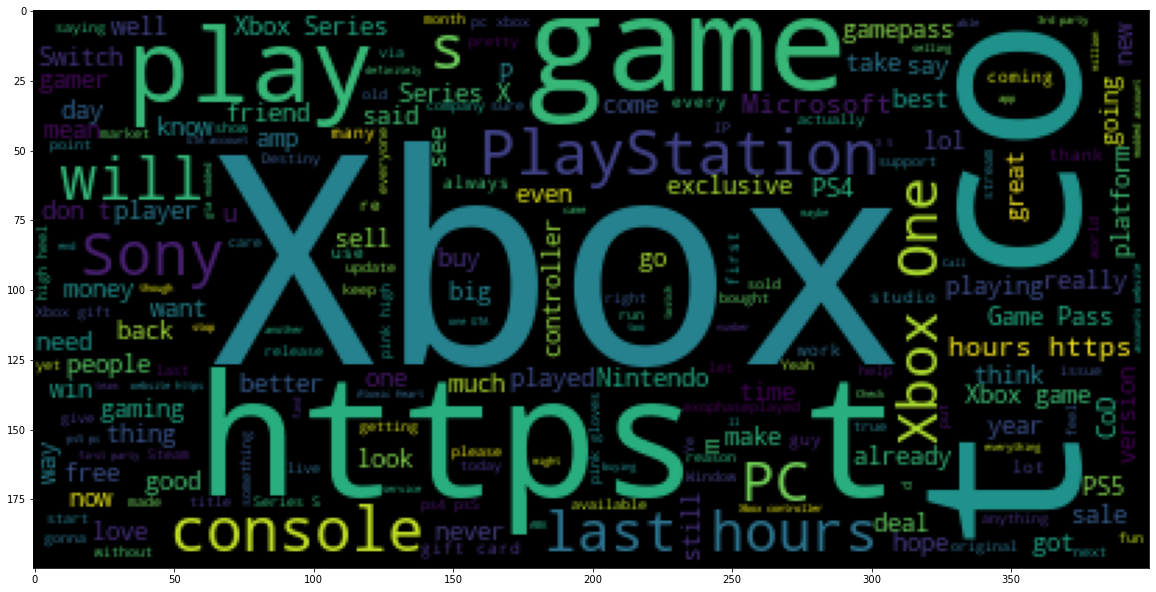

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(PositiveTextXbox))

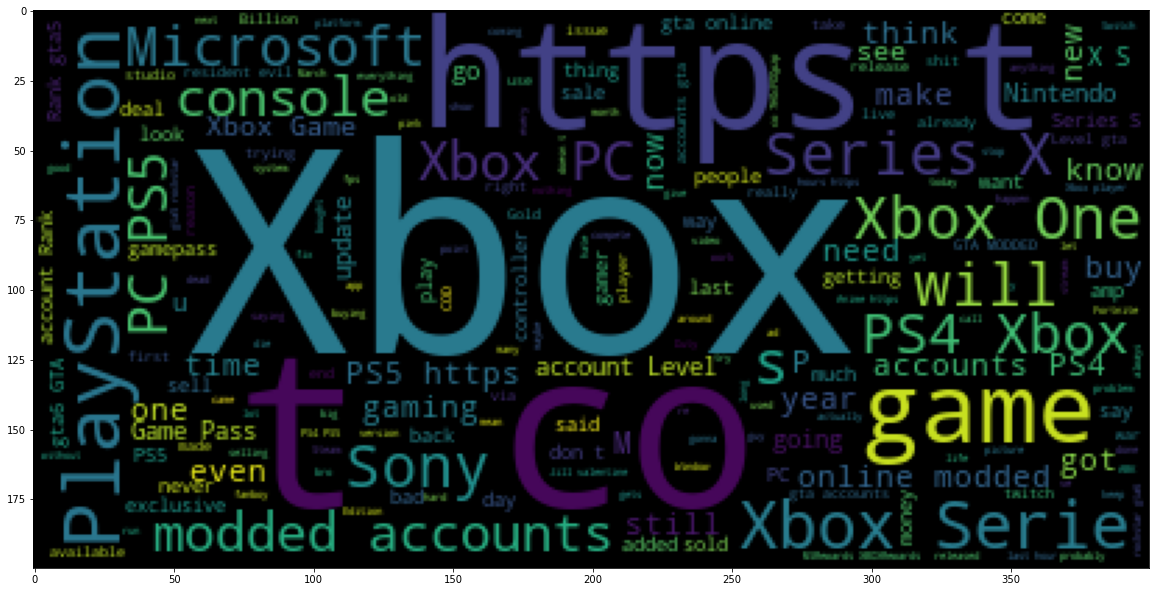

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(NegativeTextXbox))

#### Playstation

In [28]:
PositiveTextPlay = ''.join(PositivePlay['Tweet'].tolist())
NegativeTextPlay = ''.join(NegativePlay['Tweet'].tolist())

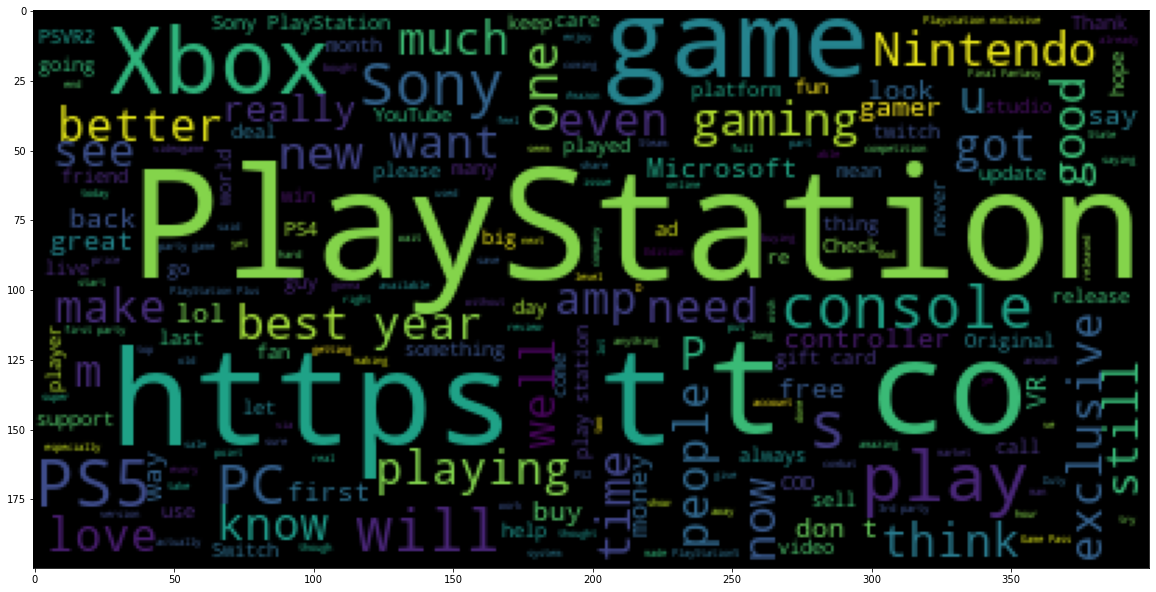

In [29]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(PositiveTextPlay))

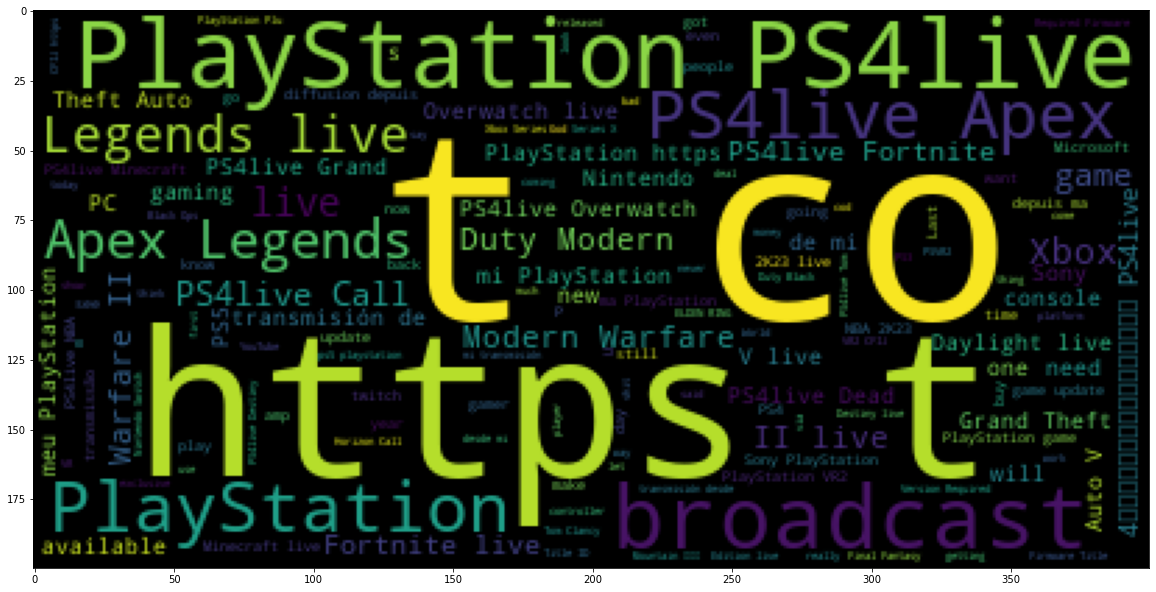

In [30]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(NegativeTextPlay))

## Particular subject

In [31]:
dfXbox['Live'] = dfXbox['Tweet'].apply(lambda x:1 if 'gamepass' in x or 'game pass' in x or 'live' in x else 0)

In [32]:
dfPlayStation['Live'] = dfPlayStation['Tweet'].apply(lambda x:1 if 'live' in x or 'plus' in x else 0)

In [33]:
dfXbox['Live'].value_counts()

0    9658
1     342
Name: Live, dtype: int64

In [34]:
dfPlayStation['Live'].value_counts()

0    6246
1    3754
Name: Live, dtype: int64

## Graph

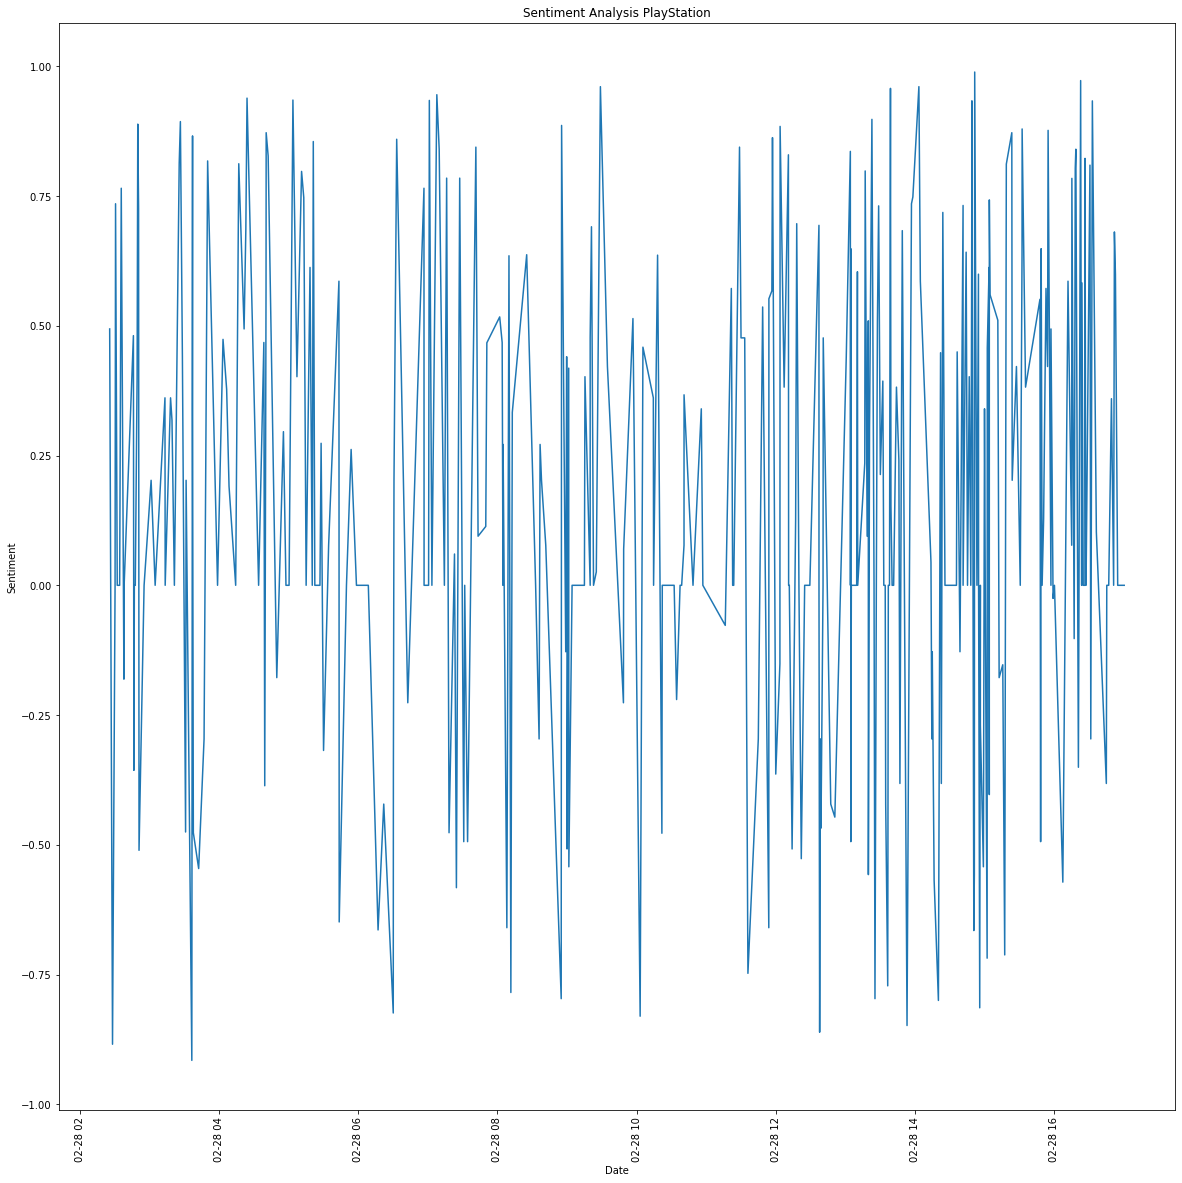

In [35]:
y_axis = dfXbox['Compound'][dfXbox['Live'] == 1]
x_axis = dfXbox['Date'][dfXbox['Live'] == 1]
plt.figure(figsize=(20,20))

plt.plot(x_axis, y_axis)
plt.title('Sentiment Analysis PlayStation')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation = 90)
plt.show()

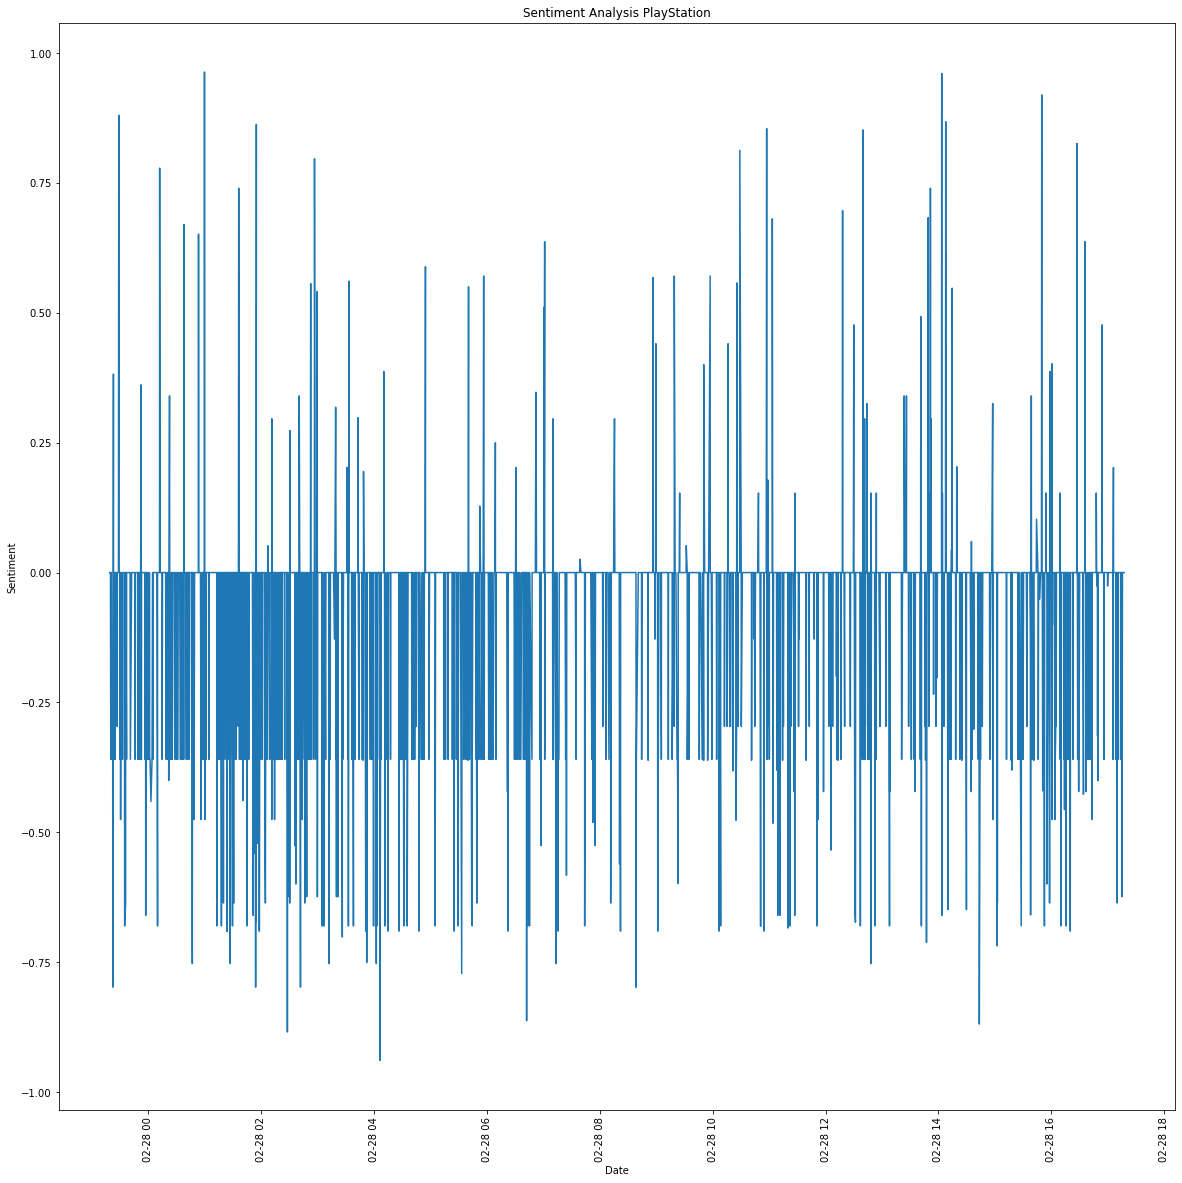

In [36]:
y_axis = dfPlayStation['Compound'][dfPlayStation['Live'] == 1]
x_axis = dfPlayStation['Date'][dfPlayStation['Live'] == 1]
plt.figure(figsize=(20,20))

plt.plot(x_axis, y_axis)
plt.title('Sentiment Analysis PlayStation')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation = 90)
plt.show()